In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from confusion_matrix import plot_confusion_matrix
from metrics import score

from scipy.special import expit
sigmoid = expit

In [2]:
dataframe = pd.read_csv(r"data/acath.txt",sep='\t')

In [3]:
mean_chole = np.mean(list(filter(lambda x: not math.isnan(x), list(dataframe['choleste']))))
mean_chole

mean_tvdlm = np.mean(list(filter(lambda x: not math.isnan(x), list(dataframe['tvdlm']))))
mean_tvdlm

0.32247929163096256

In [4]:
dataframe = dataframe.transform({ 
    'sex': lambda x: x,
    'age': lambda x: x,
    'cad.dur': lambda x: x,
    'choleste': lambda x: mean_chole if math.isnan(x) else x,
    'sigdz': lambda x: x,
    'tvdlm': lambda x: 0.5 if math.isnan(x) else x
})

dataframe.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
0,0,73,132,268.000000,1,1.0
1,0,68,85,120.000000,1,1.0
2,0,54,45,229.928255,1,0.0
3,1,58,86,245.000000,0,0.0
4,1,56,7,269.000000,0,0.0


### Separamos los datos en train y test

In [5]:
TEST_SIZE = 0.4

X = dataframe[['age', 'cad.dur', 'choleste']].values.tolist()
# X = preprocessing.scale(X) 
y = list(map(lambda x: x[0], dataframe[['sigdz']].values.tolist()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=0)

In [6]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

* Class: 0
Accuracy 0.70257 | Precision 0.59589 | Recall 0.19551 | TP-rate 0.19551 | FP-rate 0.06165 | F1 0.29442 

* Class: 1
Accuracy 0.70257 | Precision 0.71497 | Recall 0.93835 | TP-rate 0.93835 | FP-rate 0.80449 | F1 0.81157 

HARMONIC MEANS

    Accuracy: 0.70257
    Precision: 0.65002
    Recall: 0.32359
    TP rate: 0.32359
    FP rate: 0.11453
    F1 score: 0.43208


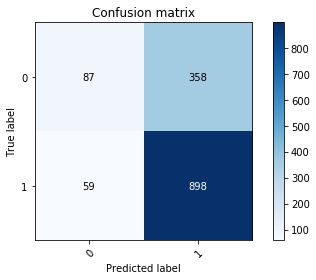

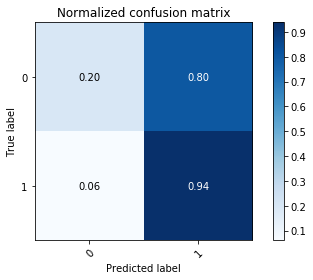

In [7]:
y_pred = lr.predict(X_test)
score(lr, [[x] for x in X_test], [[y] for y in y_test], classes = [0, 1], confusion_matrix=True)
plot_confusion_matrix(y_test, y_pred, classes=[0, 1], normalize=True)

In [8]:
# Utilizando  el  modelo  anterior  calcular  la  probabilidad  de  que  una  persona  tenga
# estrechamiento arterial si el colesterol es de 199, la edad es de 60 años y la duraciónes de 2 días
case = [[60, 2, 199]]

p = lr.predict_proba(case);
print("Probabilidad de estrechamiento: ", p[0][1])

Probabilidad de estrechamiento:  0.7213154099184702


# Ejercicios repetidos usando sexo como atributo

In [9]:
TEST_SIZE = 0.4

Xs = dataframe[['sex', 'age', 'cad.dur', 'choleste']].values.tolist()
# X = preprocessing.scale(X) 
ys = list(map(lambda x: x[0], dataframe[['sigdz']].values.tolist()))
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=TEST_SIZE, random_state=0)

* Class: 0
Accuracy 0.75392 | Precision 0.65924 | Recall 0.46517 | TP-rate 0.46517 | FP-rate 0.11181 | F1 0.54545 

* Class: 1
Accuracy 0.75392 | Precision 0.78125 | Recall 0.88819 | TP-rate 0.88819 | FP-rate 0.53483 | F1 0.83130 

HARMONIC MEANS

    Accuracy: 0.75392
    Precision: 0.71508
    Recall: 0.61057
    TP rate: 0.61057
    FP rate: 0.18495
    F1 score: 0.65870


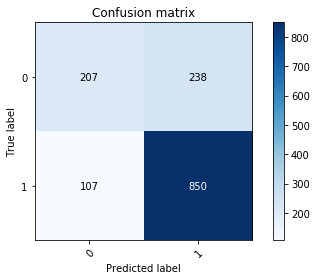

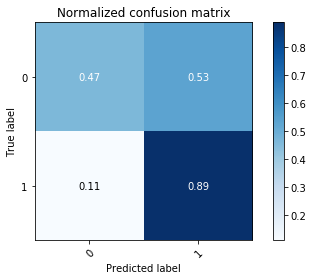

In [10]:
lrs = LogisticRegression()
lrs.fit(Xs_train, ys_train)
ys_pred = lrs.predict(Xs_test)
score(lrs, [[x] for x in Xs_test], [[y] for y in ys_test], classes = [0, 1], confusion_matrix=True)
plot_confusion_matrix(ys_test, ys_pred, classes=[0, 1], normalize=True)

In [11]:
# Utilizando  el  modelo  anterior  calcular  la  probabilidad  de  que  una  persona  tenga
# estrechamiento arterial si el colesterol es de 199, la edad es de 60 años y la duraciónes de 2 días
case = [[0, 60, 2, 199],
        [0.5, 60, 2, 199],
        [1, 60, 2, 199]
       ]

p = lrs.predict_proba(case);
print("Considerando que es hombre: ", p[0][1])
print("Considerando que es mujer: ", p[2][1])
print("Considerando sexo incierto (=0.5): ", p[1][1])

Considerando que es hombre:  0.8563291254502757
Considerando que es mujer:  0.4488691725931307
Considerando sexo incierto (=0.5):  0.6878194089491008


# Usando K-NN

In [12]:
from KNNClassifier import KNNClassifier

In [13]:
K = 5
knn = KNNClassifier(K = K)
knn.fit(X_train, y_train)

In [14]:
#score(knn, X_test, y_test, classes = [0, 1], confusion_matrix=True)

In [15]:
from kmeans import kmeans
clustered = kmeans(X, 2)

In [16]:
cluster0 = [x[0] for x in clustered if x[1]==0]
cluster1 = [x[0] for x in clustered if x[1]==1]

<IPython.core.display.Javascript object>


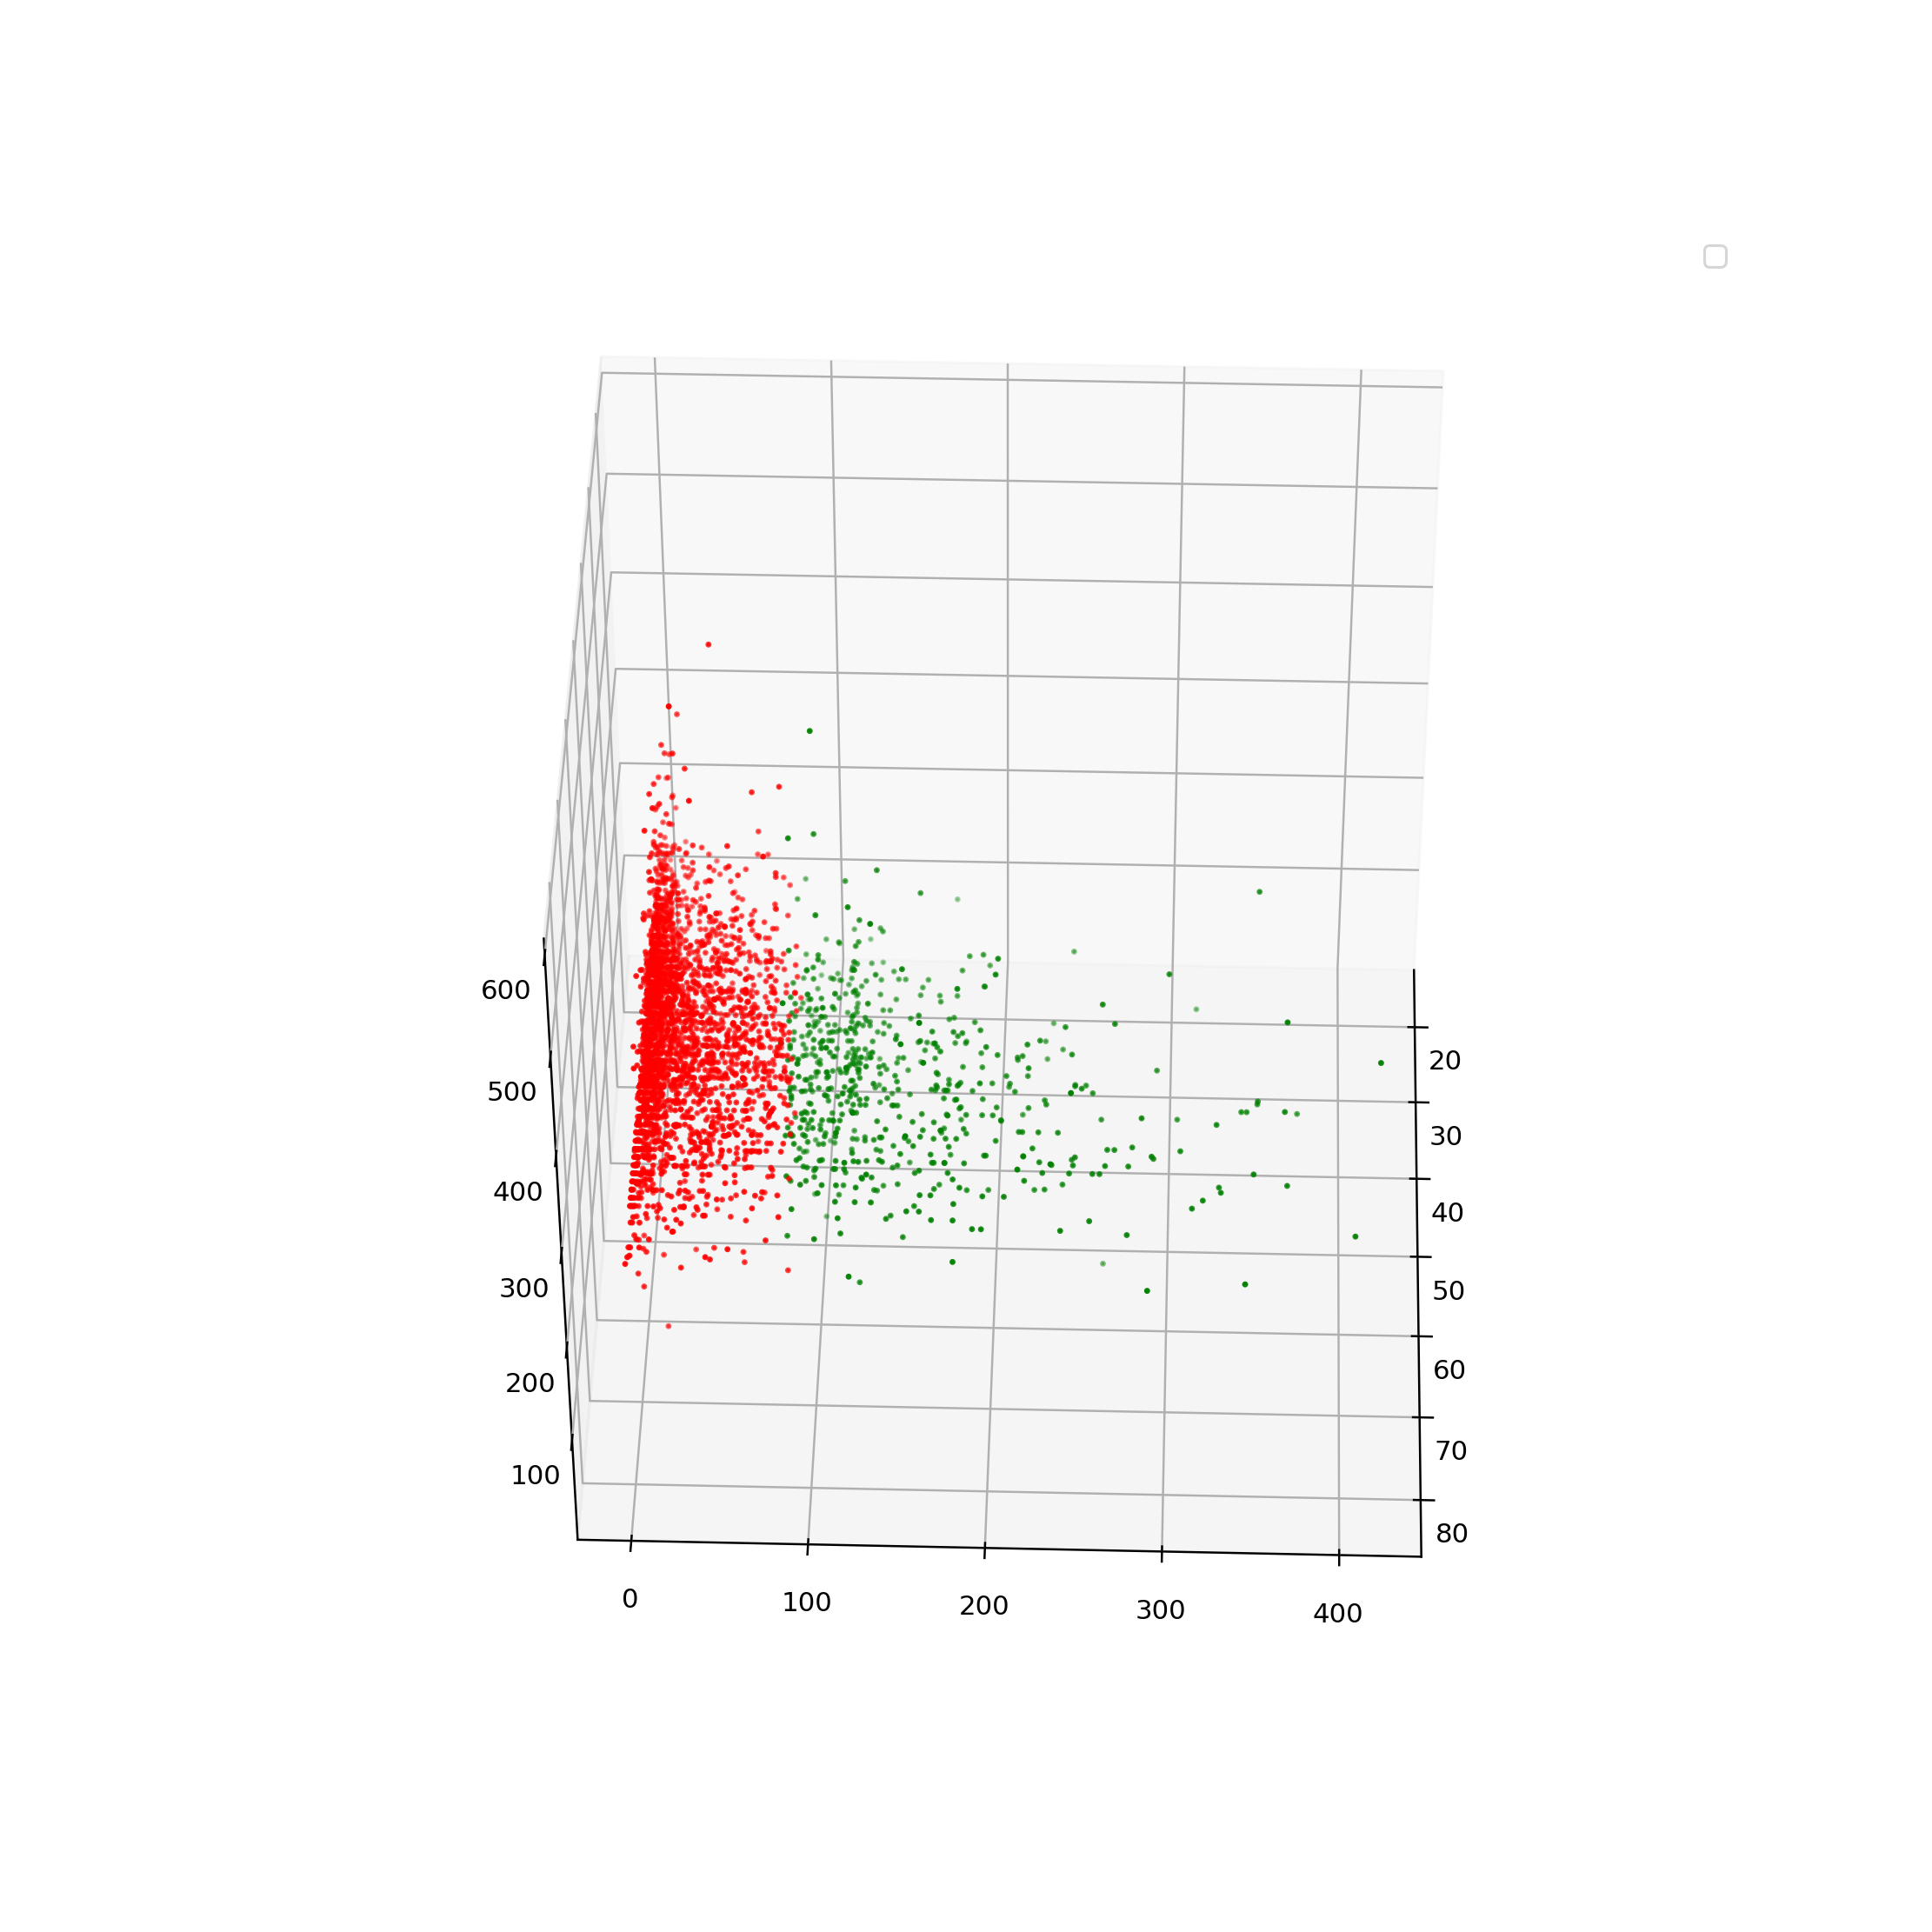

No handles with labels found to put in legend.


In [17]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
xs = [x[0] for x in cluster0]
ys = [x[1] for x in cluster0]
zs = [x[2] for x in cluster0]
ax.scatter(xs, ys, zs, c='g', s=1.5)
xs = [x[0] for x in cluster1]
ys = [x[1] for x in cluster1]
zs = [x[2] for x in cluster1]
ax.scatter(xs, ys, zs, c='r', s=1.5)
ax.legend(loc='best')

plt.show()